In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return (self.X[i], self.Y[i])


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [3]:
X = torch.tensor([[3.0, 8],
                  [4, 5],
                  [5, 7],
                  [6, 3],
                  [2, 1]])
Y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7])

In [4]:
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)

In [5]:
model = LinearRegression(2, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [6]:
loss_list = []
for epoch in range(500):
    running_loss = 0.0
    optimizer.zero_grad()
    
    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()

    loss_list.append(running_loss.item())

    if epoch % 10 == 0:
        print("The parameters are w1={:.4f}, w2={:.4f}, b={:.4f} and loss={:.4f}".format(model.linear.weight[0][0], model.linear.weight[0][1], model.linear.bias.item(), running_loss.item()))

/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


The parameters are w1=0.4421, w2=0.2797, b=-0.4019 and loss=29.2330
The parameters are w1=0.5843, w2=0.1646, b=-0.3784 and loss=25.7970
The parameters are w1=0.7186, w2=0.0581, b=-0.3558 and loss=22.7760
The parameters are w1=0.8450, w2=-0.0413, b=-0.3342 and loss=20.1190
The parameters are w1=0.9637, w2=-0.1342, b=-0.3136 and loss=17.7820
The parameters are w1=1.0749, w2=-0.2213, b=-0.2940 and loss=15.7264
The parameters are w1=1.1793, w2=-0.3030, b=-0.2753 and loss=13.9184
The parameters are w1=1.2771, w2=-0.3795, b=-0.2574 and loss=12.3280
The parameters are w1=1.3687, w2=-0.4514, b=-0.2403 and loss=10.9290
The parameters are w1=1.4546, w2=-0.5187, b=-0.2240 and loss=9.6984
The parameters are w1=1.5351, w2=-0.5819, b=-0.2084 and loss=8.6158
The parameters are w1=1.6106, w2=-0.6412, b=-0.1935 and loss=7.6634
The parameters are w1=1.6813, w2=-0.6968, b=-0.1792 and loss=6.8256
The parameters are w1=1.7475, w2=-0.7490, b=-0.1655 and loss=6.0884
The parameters are w1=1.8096, w2=-0.7979, 

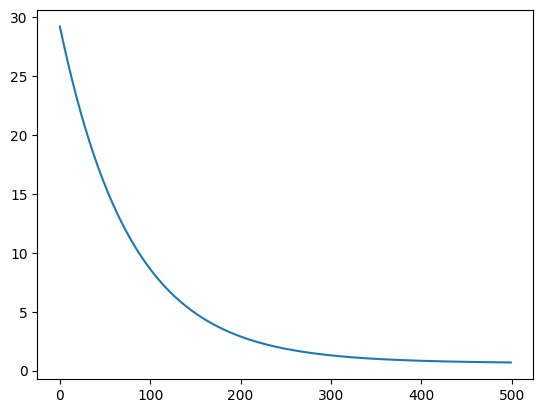

In [7]:
plt.plot(loss_list)
plt.show()